In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# pandas es para habilitar las dataframe.
# numpy es para realizar operaciones matemáticas.
# matplotlib.pyplot es para realizar los gráficos.
# statsmodels proporciona clases y funciones para la estimación de muchos modelos estadísticos y econométricos.


In [ ]:
# 1.- Importar data de Excel
# 1.1.- Cargar como data frame
data_frame = pd.read_excel('Peru_Data.xlsx')


In [ ]:
# 1.2.- Reexpresamos PBI per capita en logaritmos
data_frame['Log_GDP_pc'] = np.log(data_frame['GDP_pc'])
data_frame.head()

,Year,GDP_pc,Log_GDP_pc
0,1950,5261.366616,8.568146
1,1951,5603.533142,8.631153
2,1952,5783.288937,8.662728
3,1953,5961.176477,8.693023
4,1954,6117.243259,8.718867


In [ ]:
# Extraemos las variables de interés
year = data_frame['Year']
ln_gdp = data_frame['Log_GDP_pc']

Text(0.5, 1.0, 'Log GDP per capita over Time')

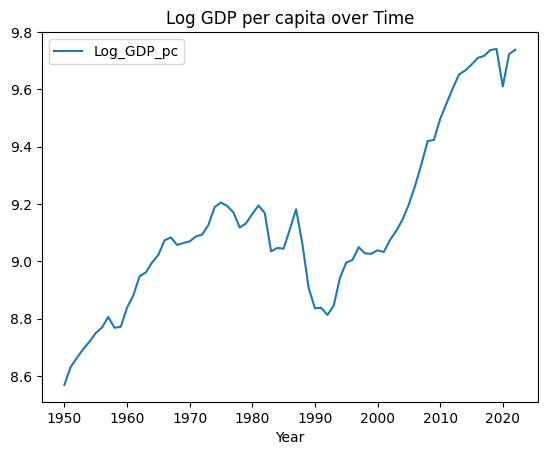

In [ ]:
# 2.- Graficamos la variable de log GDP_pc
data_frame.plot(x='Year', y=['Log_GDP_pc'])
plt.title('Log GDP per capita over Time')

In [ ]:
# 3.- Definimos la tendencia
trend = np.arange(1, len(data_frame) + 1)  # Usar la longitud real de los datos
trend
# array define matrices en python.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [ ]:
# 4.- Realizamos el análisis estadístico de regresión
X = sm.add_constant(trend)
# Se crea una constante que acompañe a la tendencia.
regress = sm.OLS(data_frame['Log_GDP_pc'], X).fit()
print(regress.summary())

                            OLS Regression Results                            
Dep. Variable:             Log_GDP_pc   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     141.4
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.47e-18
Time:                        23:49:47   Log-Likelihood:                 23.913
No. Observations:                  73   AIC:                            -43.83
Df Residuals:                      71   BIC:                            -39.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6968      0.042    207.961      0.0

In [ ]:
# 5.- Graficamos el resultado
# Hallamos el Log_GDP_pc estimado (tendencia)
Log_GDP_est = regress.predict(X)
data_frame['Log_GDP_est'] = Log_GDP_est
# Se crea una columna llamada Log_GDP_est, con los datos de la predicción.

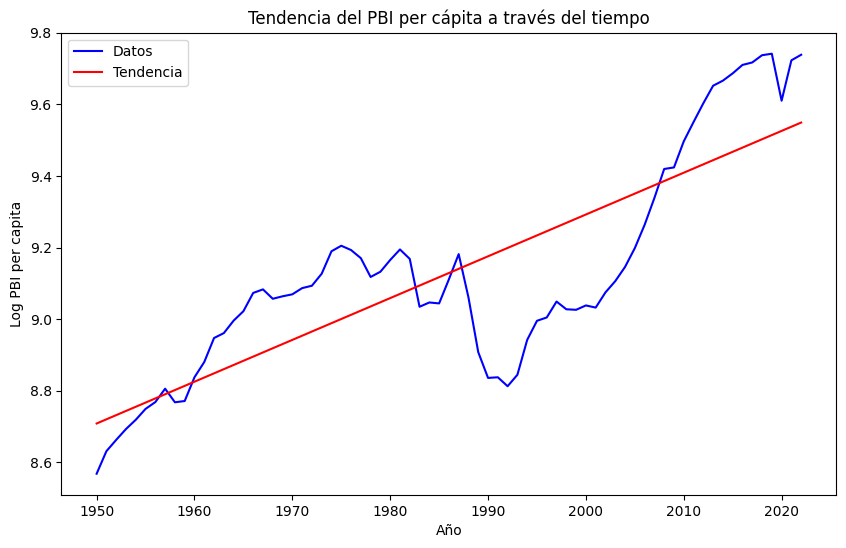

In [ ]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias

# Gráfico de valores reales (línea)
plt.plot(year, ln_gdp, label='Datos', color='blue')

# Gráfico de valores predichos (línea)
plt.plot(year, Log_GDP_est, label='Tendencia', color='red')

plt.title('Tendencia del PBI per cápita a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Log PBI per capita')
plt.legend()
plt.show()

